### Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
### Create a Model using Naive Bayes classifiers to predict whether a passenger on the titanic would have been survived or not.

##### Dataset can be downloaded from Kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

In [2]:
df=pd.read_csv('train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.ndim

2

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
null_df=pd.DataFrame()
null_df['Features']=df.isnull().sum().index
null_df['Null values']=df.isnull().sum().values
null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)

,Features,Null values,% Null values
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
6,SibSp,0,0.000000
7,Parch,0,0.000000


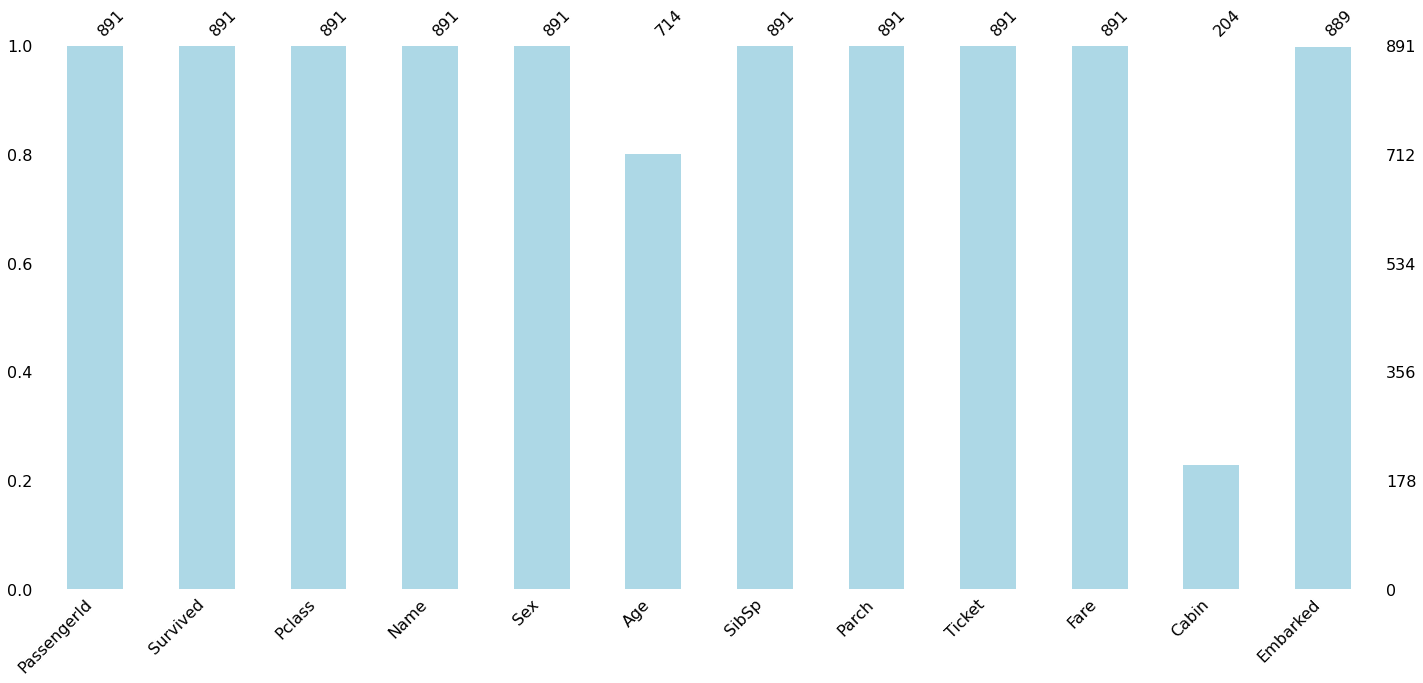

In [11]:
import missingno as no
no.bar(df,color='lightblue')
plt.show()

In [12]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.Age.isna().any()

False

In [13]:
df.drop(columns='Cabin' , inplace=True)

In [14]:
df.dropna(subset=['Embarked'],inplace=True)


In [15]:
df.shape


(889, 11)

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

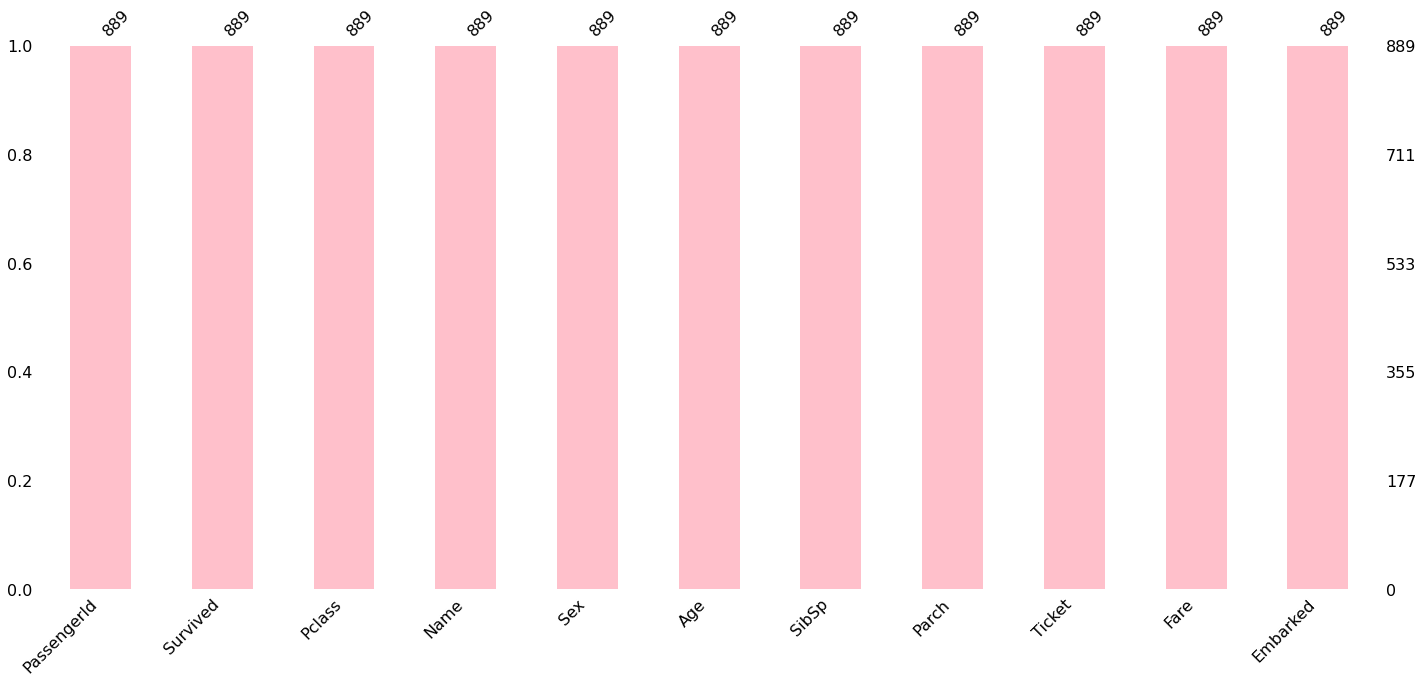

In [17]:
no.bar(df,color='pink')

In [18]:
import pingouin as pg

In [19]:
def plot_num(a):
    fig,axes=plt.subplots(3,2,figsize=(10,12))
    sns.histplot(x=df[a],kde=True,bins=10,ax=axes[0][0],palette='Pastel1')
    pg.qqplot(df[a],dist='norm',ax=axes[0][1])
    sns.barplot(x=df.Survived,y=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df.Survived,y=df[a],ax=axes[1][1],palette='Pastel1')
    sns.boxplot(y=df[a],x=df.Survived,hue='Survived',data=df,ax=axes[2][0],palette='Pastel1')
    pg.plot_blandaltman(x=df.Survived, y=df[a],ax=axes[2][1])
    plt.suptitle(a.title())
    plt.show()

D:\anaconda\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


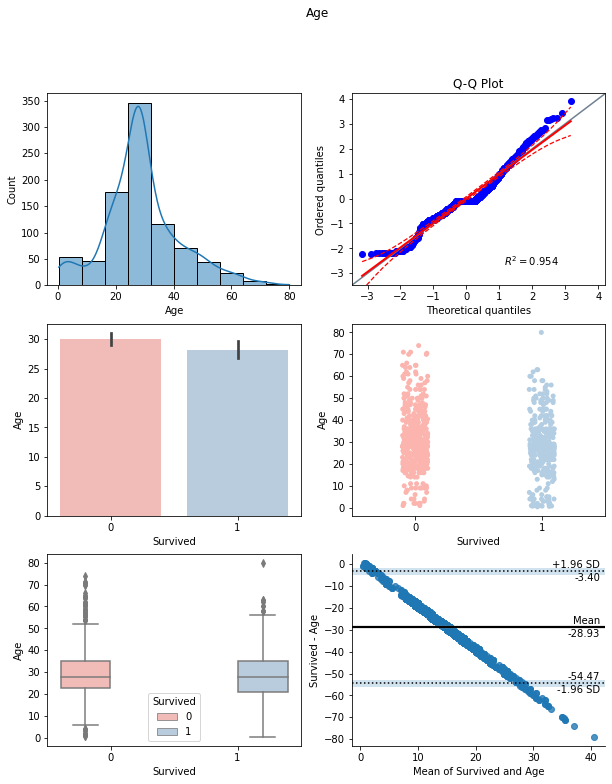

In [20]:
plot_num('Age')

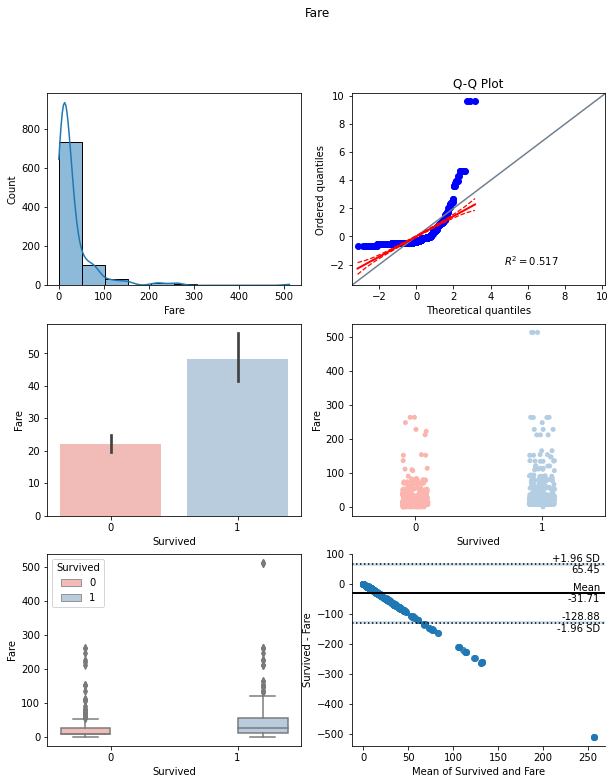

In [21]:
plot_num('Fare')

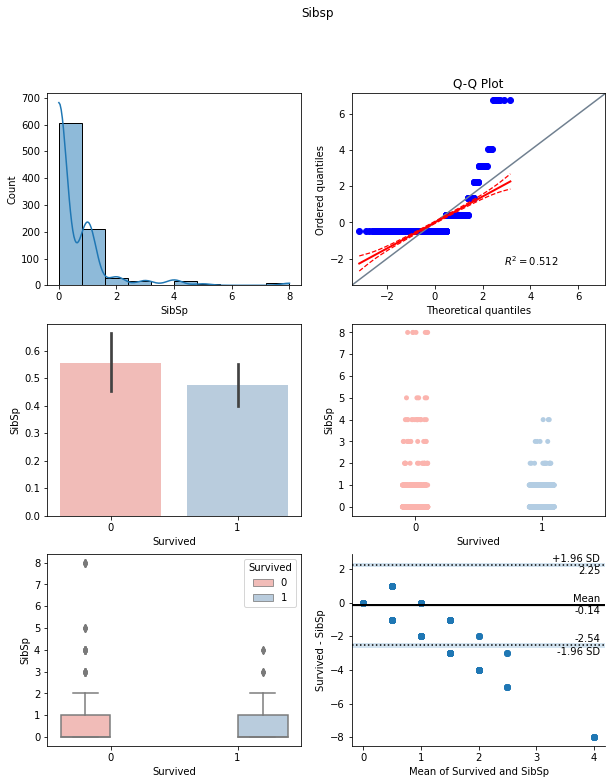

In [22]:
plot_num('SibSp')

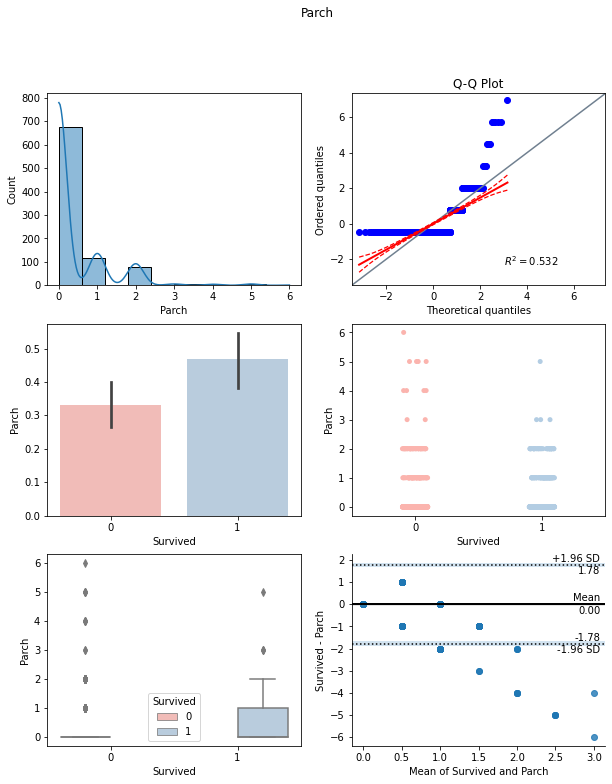

In [23]:
plot_num('Parch')

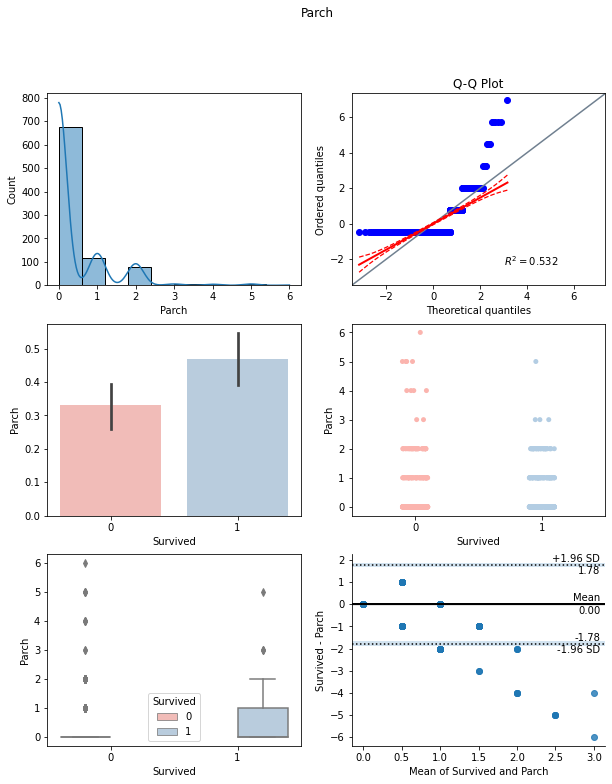

In [24]:
plot_num('Parch')

In [25]:
def plot_cat(a):
    fig,axes=plt.subplots(2,2,figsize=(10,12))
    df[a].value_counts().plot.pie(colors=['#7fffd4','#00bfff','#000080'],labels=df[a],shadow = True,
startangle = 180,autopct='%.0f%%',ax=axes[0][0])
    df[a].value_counts().plot.bar(ax=axes[0][1])
    sns.scatterplot(x=df.Fare ,y=df.Age,hue=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df[a],y=df.Fare,hue=df.Survived,ax=axes[1][1],palette='Pastel1')
    fig.suptitle("Count of"+a.title())
    plt.show()
    

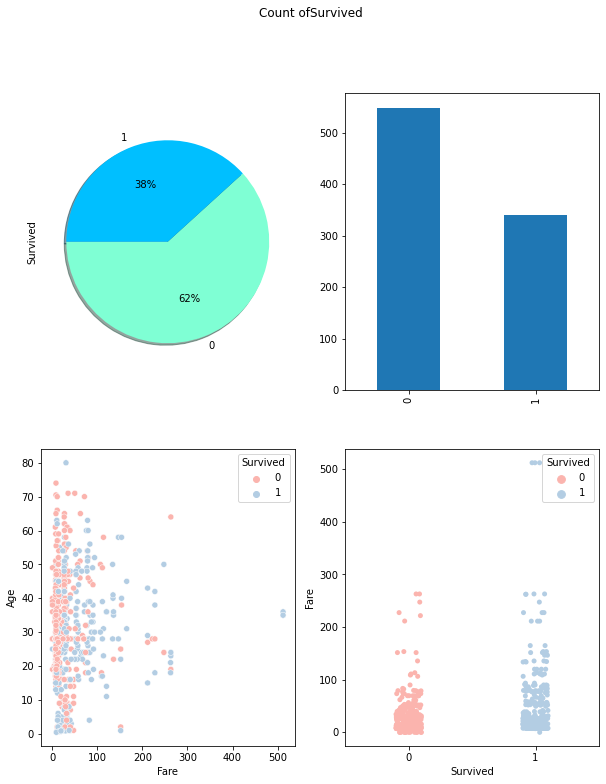

In [26]:
plot_cat('Survived')

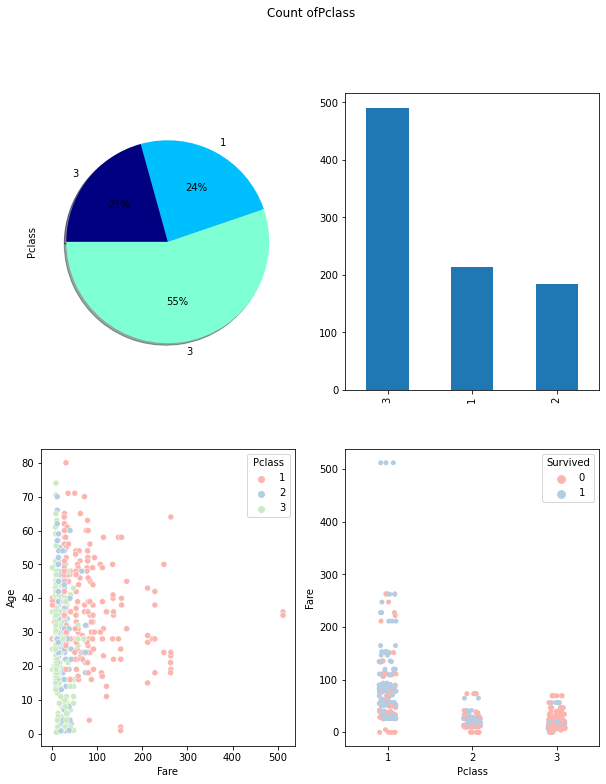

In [27]:
plot_cat('Pclass')

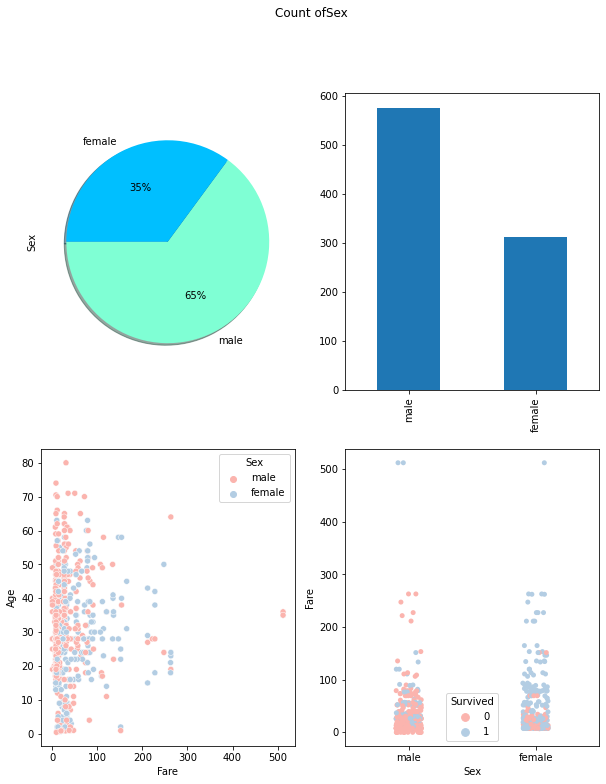

In [28]:
plot_cat('Sex')

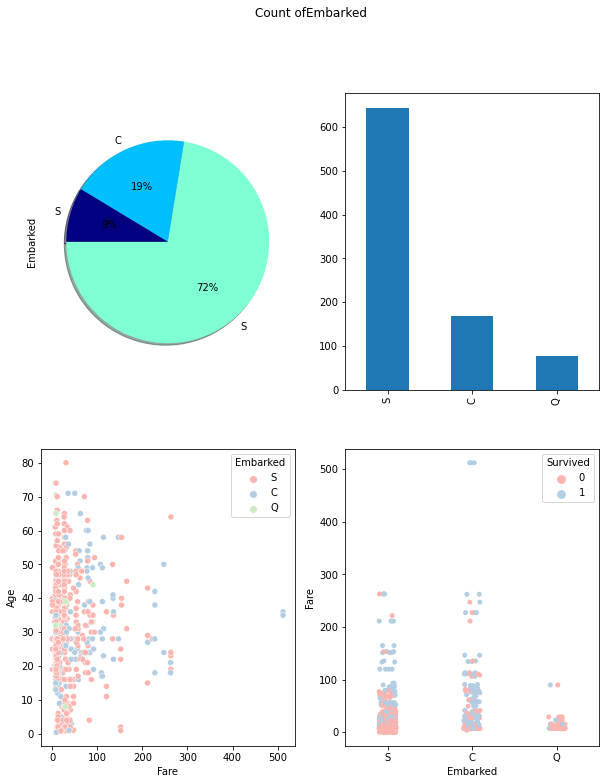

In [29]:
plot_cat('Embarked')

In [30]:
def plot_kde(a):
    facet=sns.FacetGrid(df,hue='Survived',aspect=4,palette='PuBu')
    facet.map(sns.kdeplot,a,shade=True)
    facet.set(xlim=(0,df[a].max()))
    plt.title(a.title())
    plt.show()

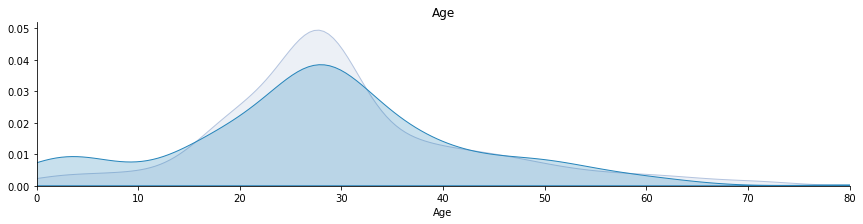

In [31]:
plot_kde('Age')

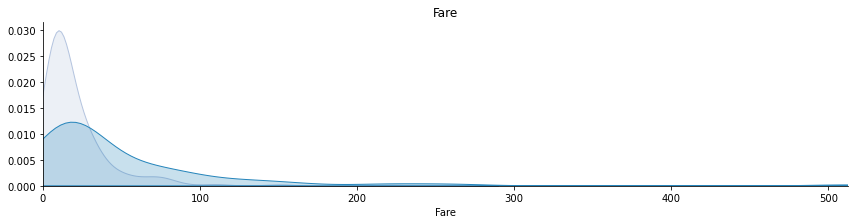

In [32]:
plot_kde('Fare')

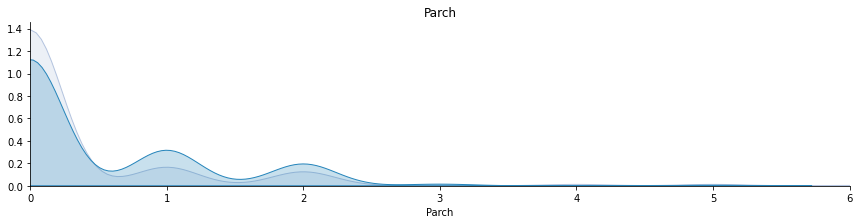

In [33]:
plot_kde('Parch')

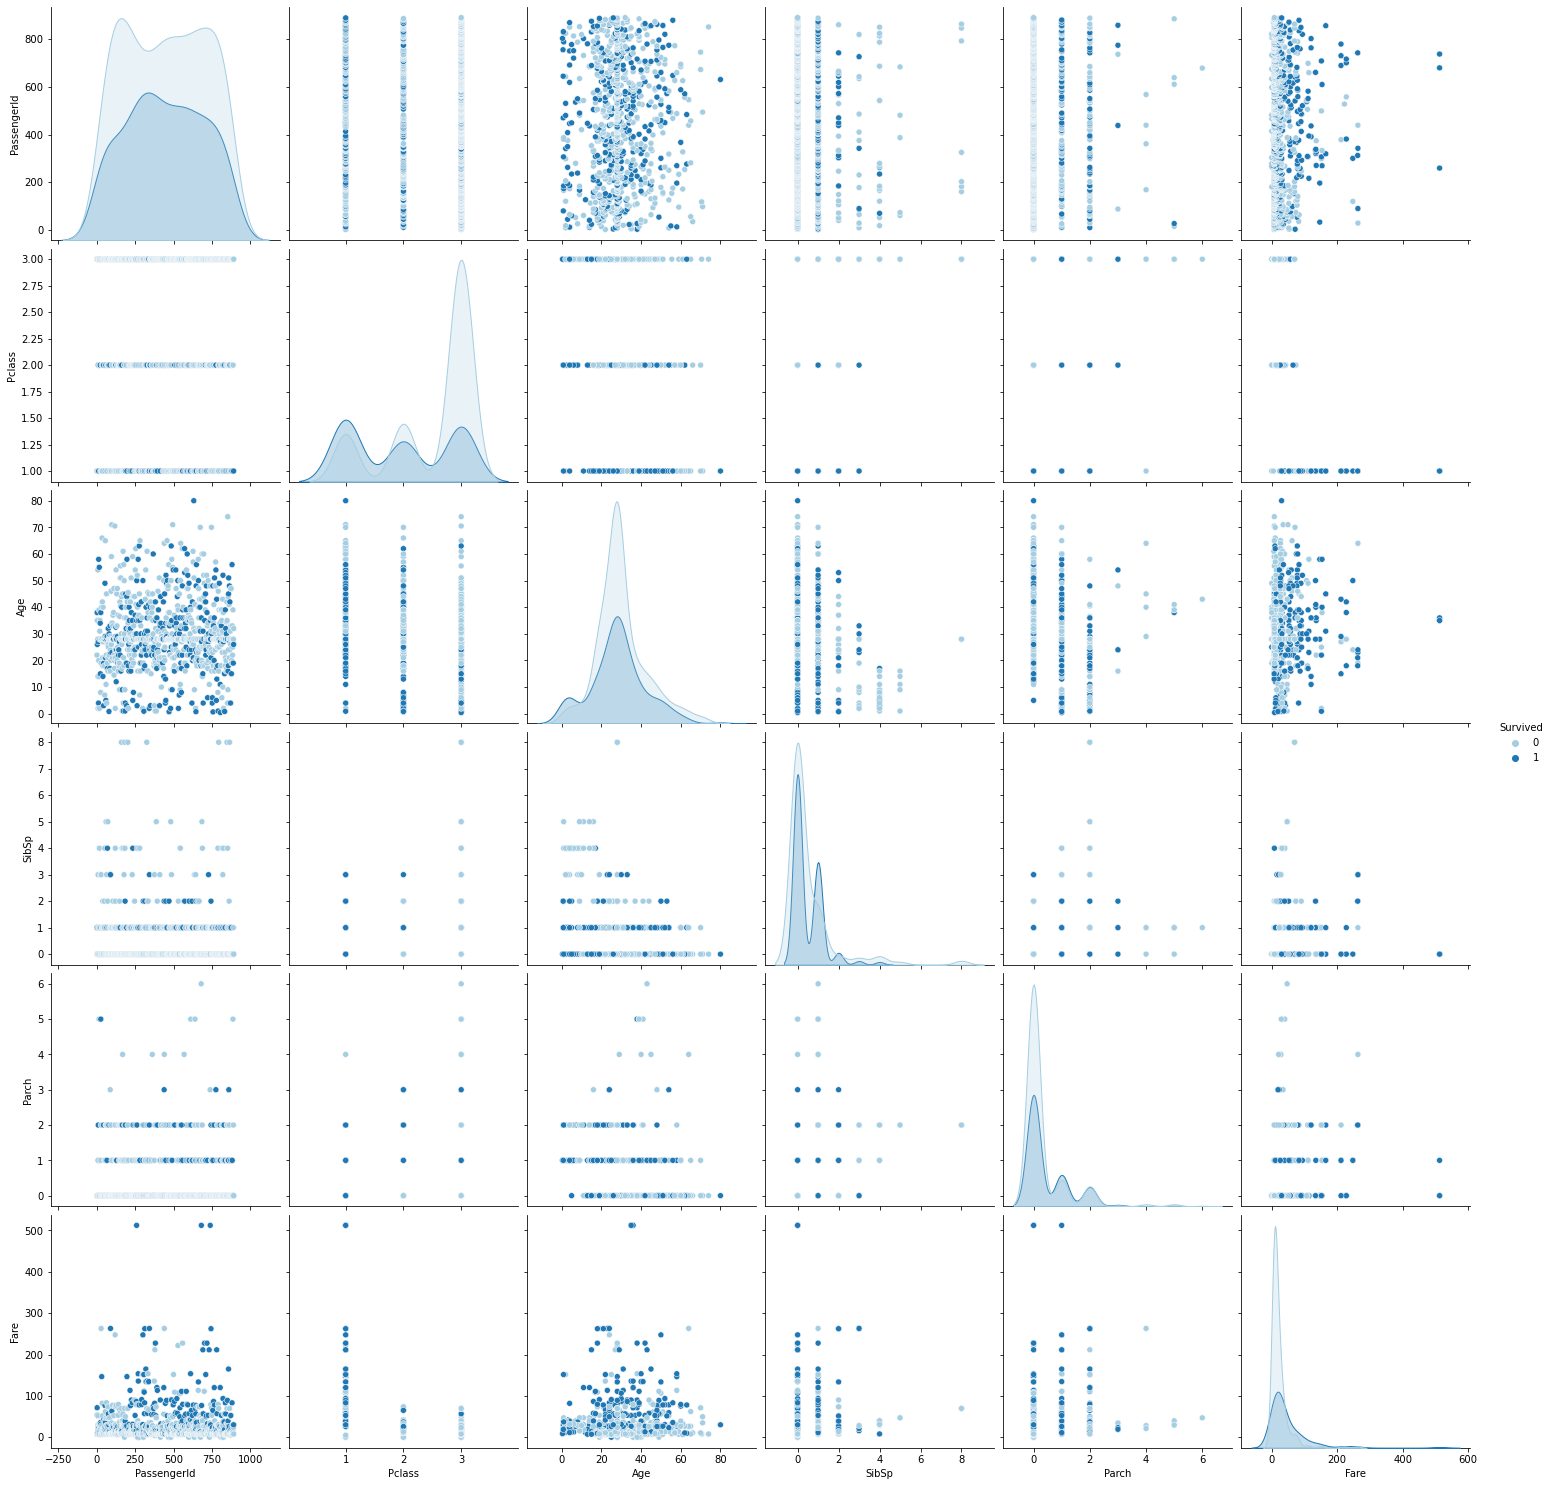

In [34]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Survived',height=3.5)
plt.show()

### Data Preprocessing

In [35]:
import  yellowbrick
from sklearn.preprocessing import LabelEncoder
label_Enc =LabelEncoder()

In [36]:
df.Sex =label_Enc.fit_transform(df.Sex)

In [37]:
label_Enc.classes_

array(['female', 'male'], dtype=object)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


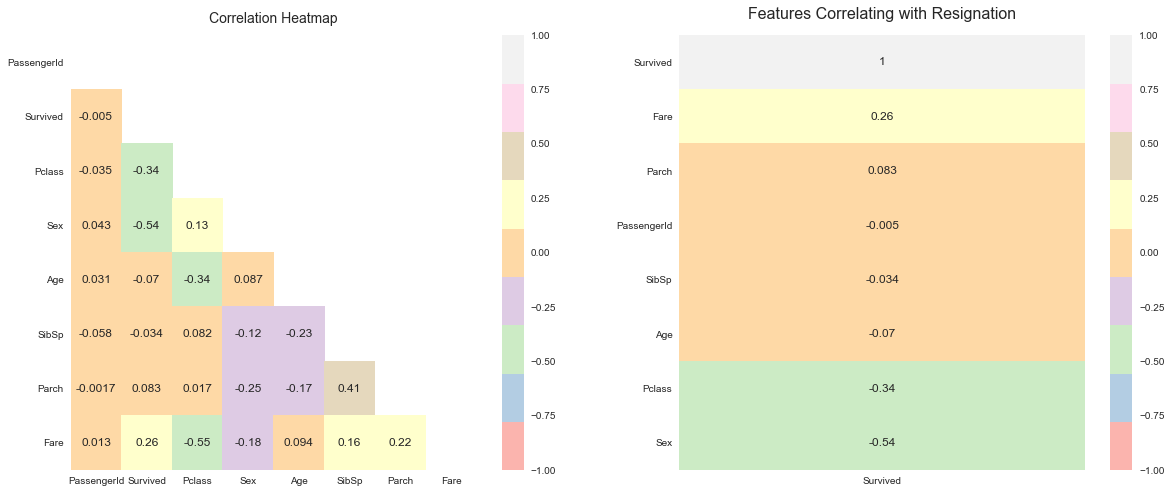

In [39]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Pastel1')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Survived']].sort_values(by='Survived',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Pastel1')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);

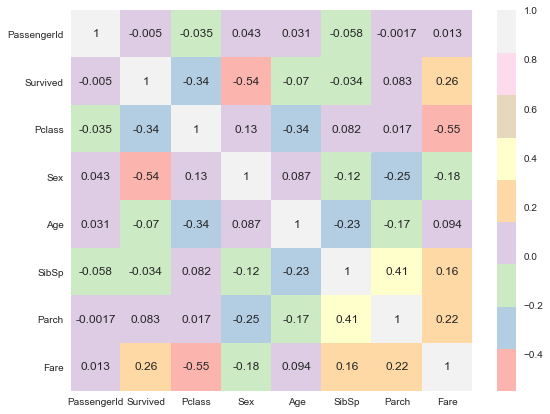

In [40]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()

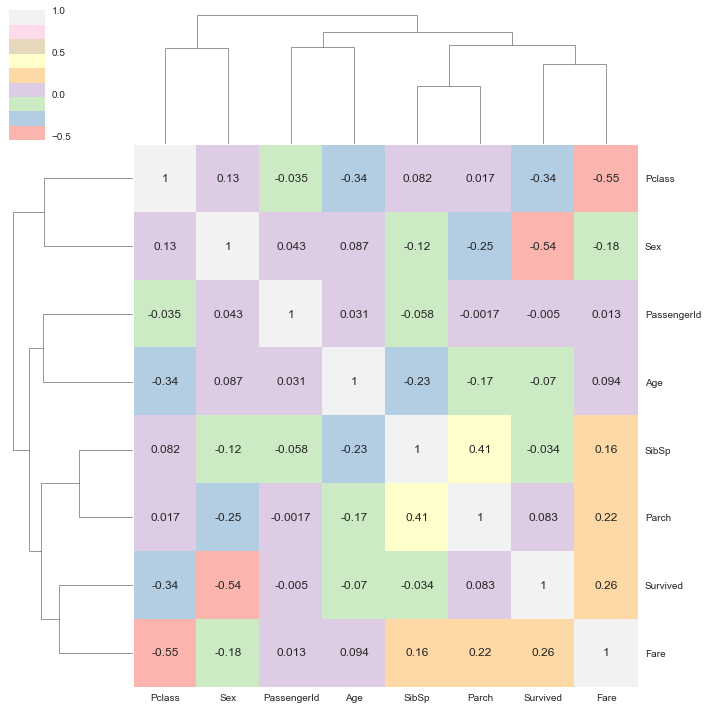

In [41]:
sns.clustermap(df.corr(),annot=True,cmap='Pastel1')

### Dataset Splitting

In [42]:
X=df.drop(['Survived','Name','Ticket','Embarked'],axis=1)
y=df['Survived']

In [43]:
X[:3]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250


In [44]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state =42)

### Gaussian Naive Bayes Calssifier

In [46]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb_clf=GaussianNB()

In [49]:
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [50]:
y_pred = gnb_clf.predict(X_test)

In [51]:
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 0.7921348314606742


In [52]:
print("Recall Score",recall_score(y_test,y_pred))

Recall Score 0.7058823529411765


In [53]:
print("Precision Score :",precision_score(y_test,y_pred))

Precision Score : 0.7384615384615385


In [54]:
print("F1 Score :",f1_score(y_test,y_pred))

F1 Score : 0.7218045112781954


### ROC Curve

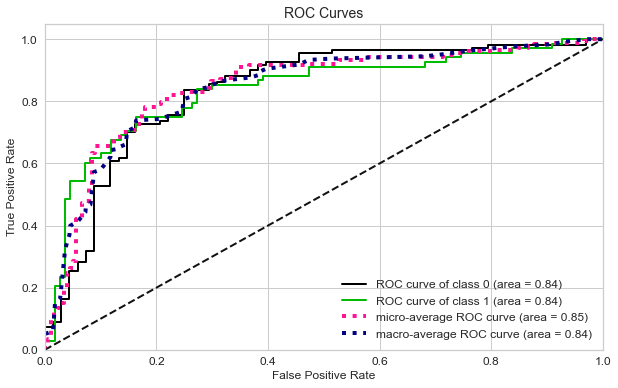

In [55]:
y_probas = gnb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Precision Recall Curve

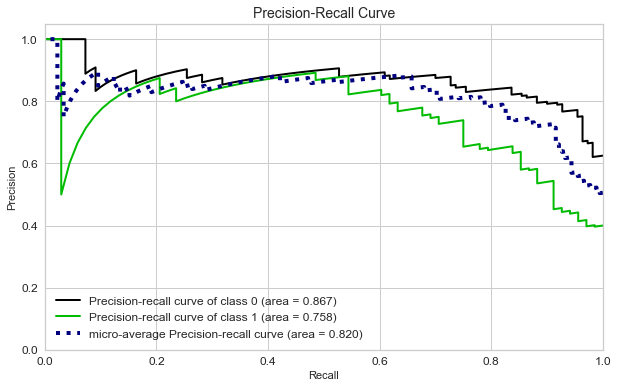

In [56]:
skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Learning Curve

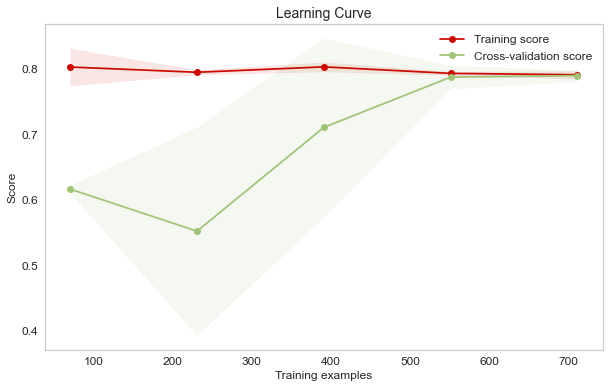

In [57]:
skplt.estimators.plot_learning_curve(gnb_clf, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Lift Curve

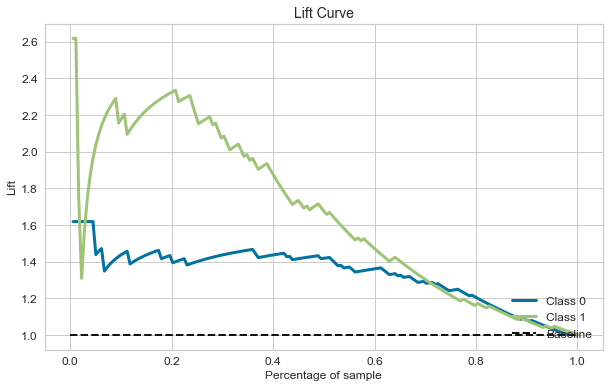

In [58]:
skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

### Confusion Matrix

In [59]:
confusion_matrix(y_test, y_pred)

array([[93, 17],
       [20, 48]], dtype=int64)

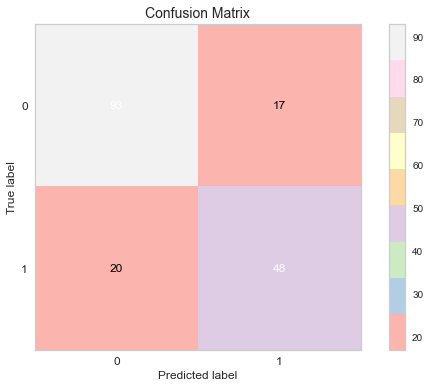

In [60]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
plt.show()

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.74      0.71      0.72        68

    accuracy                           0.79       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



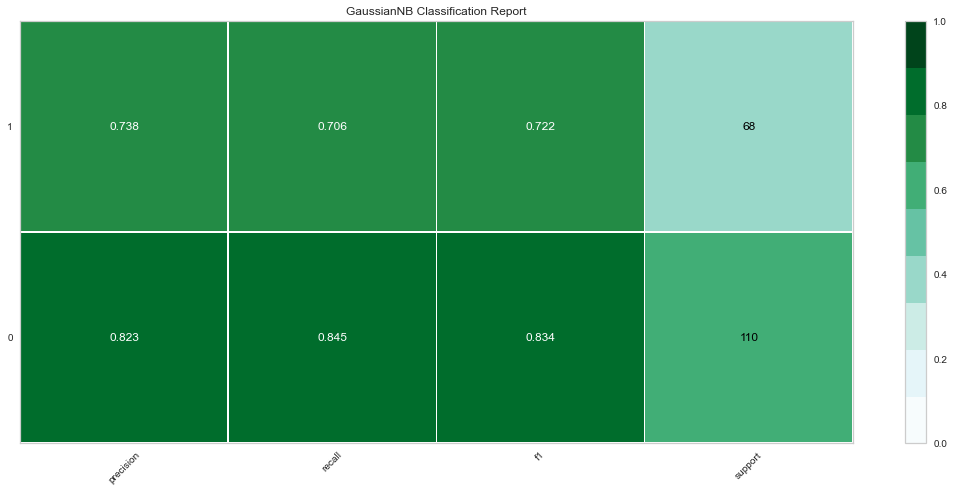

In [62]:
import yellowbrick as yb
plt.figure(figsize=(15,7))
visualizer = yb.classifier.classification_report(gnb_clf, X_train, y_train, X_test, y_test,  support=True,cmap="BuGn")
visualizer.show()
plt.show()